# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#cities_df = pd.read_csv(output_data_file)
#cities_df.head()


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
'''
cities_lat_lngs = []
cities_list = []


for index, row in cities_df.iterrows():
    cities_lat_lngs.append("(%s, %s)" % (row['Lat'], row['Lng']))
    cities_list.append(row['City'])

print(cities_lat_lngs)
print(cities)

'''

'\ncities_lat_lngs = []\ncities_list = []\n\n\nfor index, row in cities_df.iterrows():\n    cities_lat_lngs.append("(%s, %s)" % (row[\'Lat\'], row[\'Lng\']))\n    cities_list.append(row[\'City\'])\n\nprint(cities_lat_lngs)\nprint(cities)\n\n'

In [5]:
# List for holding lat_lngs and cities
cities = []
lat_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

601
['fortuna', 'hasaki', 'ushuaia', 'albany', 'adiake', 'arlit', 'kiama', 'rikitea', 'illoqqortoormiut', 'mahaicony', 'hermanus', 'artyk', 'baykit', 'hilo', 'arraial do cabo', 'bubaque', 'shelburne', 'luganville', 'bredasdorp', 'kobojango', 'puerto ayora', 'yulara', 'manmad', 'fort nelson', 'mataura', 'bilibino', 'barrow', 'busselton', 'vaini', 'hithadhoo', 'faanui', 'adrar', 'georgetown', 'castro', 'kodiak', 'thompson', 'cape town', 'prince rupert', 'high rock', 'richards bay', 'vaitupu', 'saint-philippe', 'belushya guba', 'lompoc', 'grand river south east', 'marcona', 'bengkulu', 'beyneu', 'hobart', 'chimbote', 'provideniya', 'aksarka', 'bako', 'altay', 'barentsburg', 'mareeba', 'deep river', 'asheville', 'itajuba', 'khatanga', 'douentza', 'severo-kurilsk', 'moose factory', 'taolanaro', 'makakilo city', 'lebu', 'kavaratti', 'saskylakh', 'bathsheba', 'bethel', 'yilan', 'tsihombe', 'gat', 'notodden', 'saint-augustin', 'tuktoyaktuk', 'palmer', 'leningradskiy', 'kautokeino', 'zilair', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []
list_of_cities = []
list_lat = []
list_lng = []


for city in range(len(cities)):
    for setNum in range(int(len(cities) / 50)):
        for rec in range(50):            
            try:
                target_url = f"{base_url}appid={weather_api_key}&q={cities[city]}"
                response = requests.get(target_url).json()
                
                max_temp.append(response['main']['temp_max'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['clouds']['all'])
                wind_speed.append(response['wind']['speed'])
                date.append(response['dt'])
                country.append(response['sys']['country'])
                list_of_cities.append(cities[city])
                list_lat.append(response['coord']['lat'])
                list_lng.append(response['coord']['lon'])
                
                print(f"Processing Record {rec+1} of Set {setNum+1} | {cities[city]}")

                #city+=1
                #rec +=1
            except:
                print("City not found. Skipping...")
                
            city+=1
            rec +=1
                
        setNum +=1
    break


Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | adiake
Processing Record 6 of Set 1 | arlit
Processing Record 7 of Set 1 | kiama
Processing Record 8 of Set 1 | rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
City not found. Skipping...
Processing Record 13 of Set 1 | baykit
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | bubaque
Processing Record 17 of Set 1 | shelburne
Processing Record 18 of Set 1 | luganville
Processing Record 19 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | yulara
Processing Record 23 of Set 1 | manmad
Processing Record 24 of Set 1 | fort nelson
Processing Record 25 of Set 1 | mataura
Processing Record 26 of Set 1 | bilibino
Pr

Processing Record 10 of Set 5 | hoa binh
Processing Record 11 of Set 5 | lundazi
Processing Record 12 of Set 5 | tasiilaq
Processing Record 13 of Set 5 | tukrah
Processing Record 14 of Set 5 | gwembe
Processing Record 15 of Set 5 | kavieng
Processing Record 16 of Set 5 | mattru
Processing Record 17 of Set 5 | carnarvon
Processing Record 18 of Set 5 | north myrtle beach
Processing Record 19 of Set 5 | karla
Processing Record 20 of Set 5 | hohhot
Processing Record 21 of Set 5 | auki
Processing Record 22 of Set 5 | doha
Processing Record 23 of Set 5 | chapleau
Processing Record 24 of Set 5 | pansemal
Processing Record 25 of Set 5 | oranjemund
Processing Record 26 of Set 5 | mumford
Processing Record 27 of Set 5 | kahului
Processing Record 28 of Set 5 | korla
Processing Record 29 of Set 5 | airai
Processing Record 30 of Set 5 | mar del plata
Processing Record 31 of Set 5 | viedma
Processing Record 32 of Set 5 | pochutla
Processing Record 33 of Set 5 | sao filipe
Processing Record 34 of Set

Processing Record 17 of Set 9 | coihaique
Processing Record 18 of Set 9 | boguchany
Processing Record 19 of Set 9 | omsukchan
Processing Record 20 of Set 9 | nova olinda do norte
Processing Record 21 of Set 9 | tateyama
Processing Record 22 of Set 9 | hami
Processing Record 23 of Set 9 | vyskov
Processing Record 24 of Set 9 | ust-tsilma
Processing Record 25 of Set 9 | lata
Processing Record 26 of Set 9 | fenoarivo
Processing Record 27 of Set 9 | kuala terengganu
Processing Record 28 of Set 9 | tacuarembo
Processing Record 29 of Set 9 | calama
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set 9 | kashi
Processing Record 33 of Set 9 | kushima
Processing Record 34 of Set 9 | dalnerechensk
Processing Record 35 of Set 9 | kayerkan
Processing Record 36 of Set 9 | pa sang
Processing Record 37 of Set 9 | lakes entrance
Processing Record 38 of Set 9 | santa maria
Processing Record 39 of Set 9 | kupang
Processing Record 40 of Set 9 | cherskiy
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#Save into DF
weather_df = pd.DataFrame({"City":list_of_cities, "Lat": list_lat, "Lng": list_lng, "Max Temp":max_temp,
                           "Humidity":humidity, "Cloudiness":cloudiness,
                          "Wind Speed": wind_speed, "Country":country, "Date":date})

weather_df.to_csv("city_weather_output.csv", encoding="utf-8")

In [24]:
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,282.04,100,90,1.25,US,1618733958
1,hasaki,35.7333,140.8333,291.15,27,20,2.57,JP,1618733741
2,ushuaia,-54.8000,-68.3000,284.15,54,75,4.12,AR,1618733959
3,albany,42.6001,-73.9662,279.82,68,97,0.89,US,1618733853
4,adiake,5.2863,-3.3040,300.15,83,20,1.03,CI,1618733892
5,arlit,18.7369,7.3853,307.53,4,100,4.78,NE,1618733959
6,kiama,-34.6833,150.8667,290.37,77,14,2.06,AU,1618733960
7,rikitea,-23.1203,-134.9692,298.25,71,5,2.53,PF,1618733960
8,hermanus,-34.4187,19.2345,303.71,29,0,2.30,ZA,1618733497
9,baykit,61.6700,96.3700,272.29,67,100,4.70,RU,1618733515


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
weather_df.head()
#Getting data for any cities with humidity greater than 100%. None found.
hum_100 = weather_df.loc[weather_df['Humidity'] > 100]
hum_100


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [49]:
#Read back the data from the saved CSV
saved_weather_df =pd.read_csv("city_weather_output.csv")
#saved_weather_df.head()
#Convert Temperature from Kelvin to Fahrenheit
saved_weather_df['Max Temp'] = 9/5 * (saved_weather_df['Max Temp'] - 273) + 32
#Convert Wind Speed from M/S to MPH
saved_weather_df['Wind Speed'] = saved_weather_df['Wind Speed'] * 2.237
saved_weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,fortuna,40.5982,-124.1573,48.272,100,90,2.79625,US,1618733958
1,1,hasaki,35.7333,140.8333,64.670,27,20,5.74909,JP,1618733741
2,2,ushuaia,-54.8000,-68.3000,52.070,54,75,9.21644,AR,1618733959
3,3,albany,42.6001,-73.9662,44.276,68,97,1.99093,US,1618733853
4,4,adiake,5.2863,-3.3040,80.870,83,20,2.30411,CI,1618733892


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


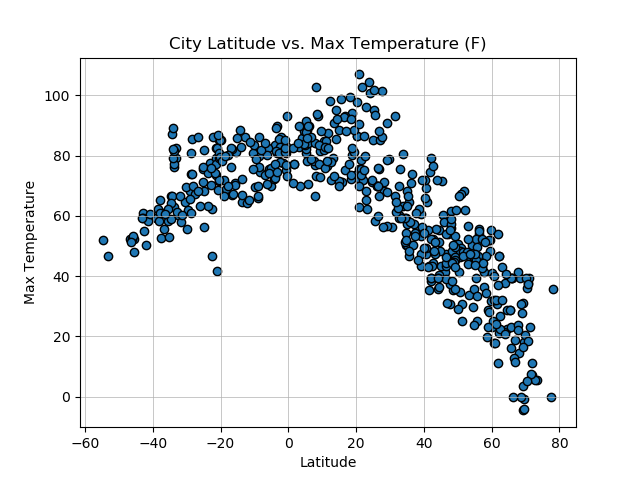

In [36]:
lat_temp = plt.scatter(saved_weather_df['Lat'], saved_weather_df['Max Temp'], edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(b=True, linewidth=.5)
lat_temp_title = "City Latitude vs. Max Temperature (F)"
plt.title(lat_temp_title)
plt.show()
plt.savefig("lat_vs_temp.png")

This is analyzing how hot it could get depending on the city's latitude. The highest temperatures are around the 0-20 latitude, but essentially the closer it is to 0, whether the latitutde is negative or positive, it will get warmer.

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


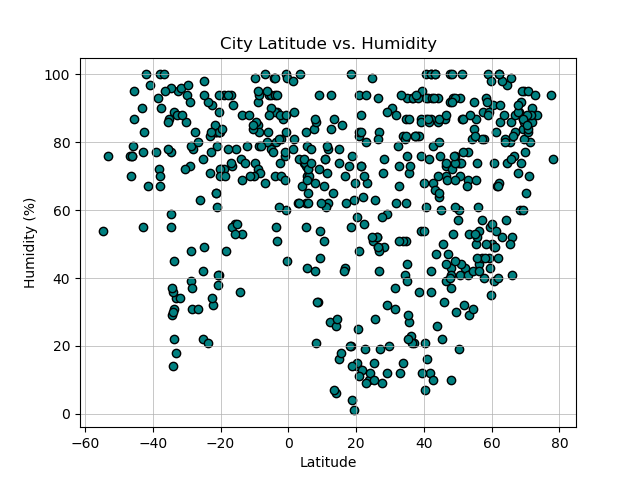

In [24]:
lat_hum = plt.scatter(saved_weather_df['Lat'], saved_weather_df['Humidity'], edgecolor='black', c="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(b=True, linewidth=.5)
plt.show()
plt.savefig("lat_vs_humidity.png")

This is analyzing if the latitude has any sort of relationship with the humidity. Although it is mostly scattered all around, generally there is a 60% of higher humidity level in most areas.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


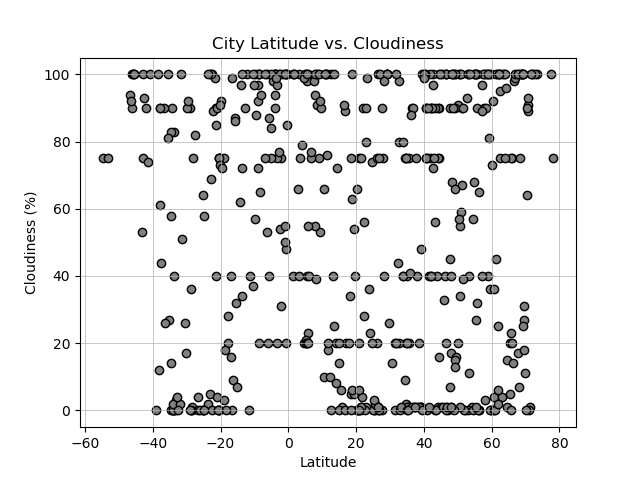

In [29]:
lat_hum = plt.scatter(saved_weather_df['Lat'], saved_weather_df['Cloudiness'], edgecolor='black', c="gray")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(b=True, linewidth=.5)
plt.show()
plt.savefig("lat_vs_cloud.png")

This is analyizing how cloudy it gets depending on the latitude. According to the plot, there isn't much of relationship between the latitude and cloudiness since regardless of latitude the cloudiness percentage is more in the extremes (0 and 100%)

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


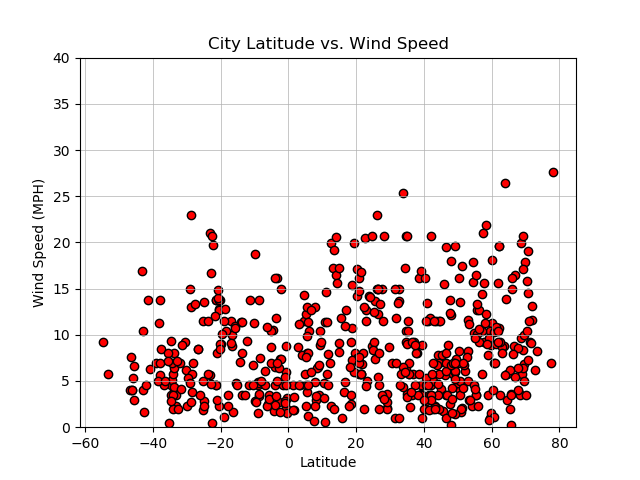

In [43]:
lat_hum = plt.scatter(saved_weather_df['Lat'], saved_weather_df['Wind Speed'], edgecolor='black', c="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude vs. Wind Speed")
plt.ylim(0, 40)
plt.grid(b=True, linewidth=.5)
plt.show()
plt.savefig("lat_vs_wind.png")

This analyzes whether the wind speed has any relationship with the latitude. According to the plot, the wind speed is pretty consistent regardless of latitutde, staying within the 0-10mph range.

## Linear Regression

In [61]:
#Get the data for those in northern and southern hemisphere
north = saved_weather_df.loc[saved_weather_df['Lat'] >= 0]
south = saved_weather_df.loc[saved_weather_df['Lat'] < 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8681468759778356


<IPython.core.display.Javascript object>


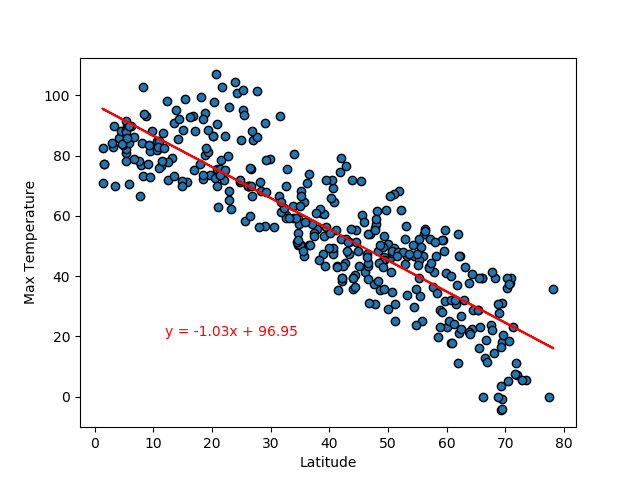

In [64]:
#Create a function that will return a string for the line equation
def line_eq(slope, intercept):
    return f"y = {round(slope, 2)}x + {round(intercept, 2)}"

#Calculate regression line
result1 = linregress(north['Lat'], north['Max Temp'])
#returns slope, intercept, rvalue pvalue, stderr

#Print out the rvalue
print(f"The r-value is {result1.rvalue}")

#Get the line equation
reg_val1 = north['Lat'] * result1.slope + result1.intercept


nlat_temp = plt.scatter(north['Lat'], north['Max Temp'], edgecolor='black')
plt.plot(north['Lat'], reg_val1, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq(result1.slope, result1.intercept), (12,20), fontsize=10, color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6444715061649844


<IPython.core.display.Javascript object>


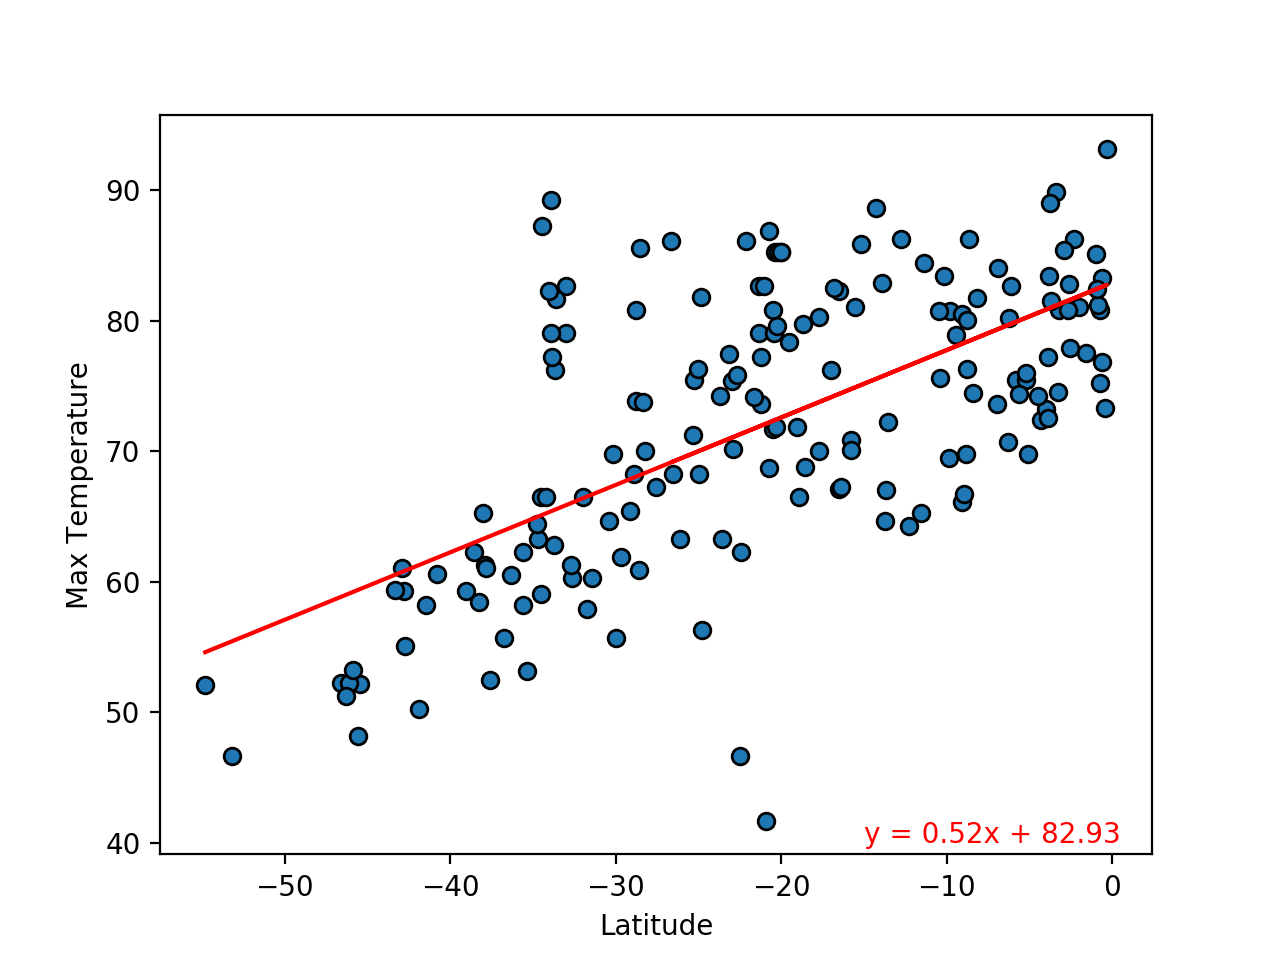

In [101]:
result2 = linregress(south['Lat'], south['Max Temp'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result2.rvalue}")
reg_val2 = south['Lat'] * result2.slope + result2.intercept

slat_temp = plt.scatter(south['Lat'], south['Max Temp'], edgecolor='black')
plt.plot(south['Lat'], reg_val2, "r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq(result2.slope, result2.intercept), (-15,40), fontsize=10, color="red")
plt.show()


Northern vs Southern - Max Temp


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.20753384897134022


<IPython.core.display.Javascript object>


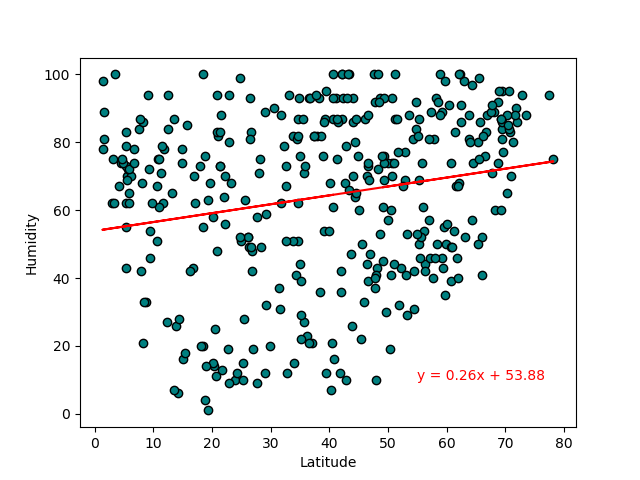

In [75]:
result3 = linregress(north['Lat'], north['Humidity'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result3.rvalue}")
reg_val3 = north['Lat'] * result3.slope + result3.intercept

nlat_temp = plt.scatter(north['Lat'], north['Humidity'], edgecolor='black', c="teal")
plt.plot(north['Lat'], reg_val3, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq(result3.slope, result3.intercept), (55,10), fontsize=10, color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.17446873022653553


<IPython.core.display.Javascript object>


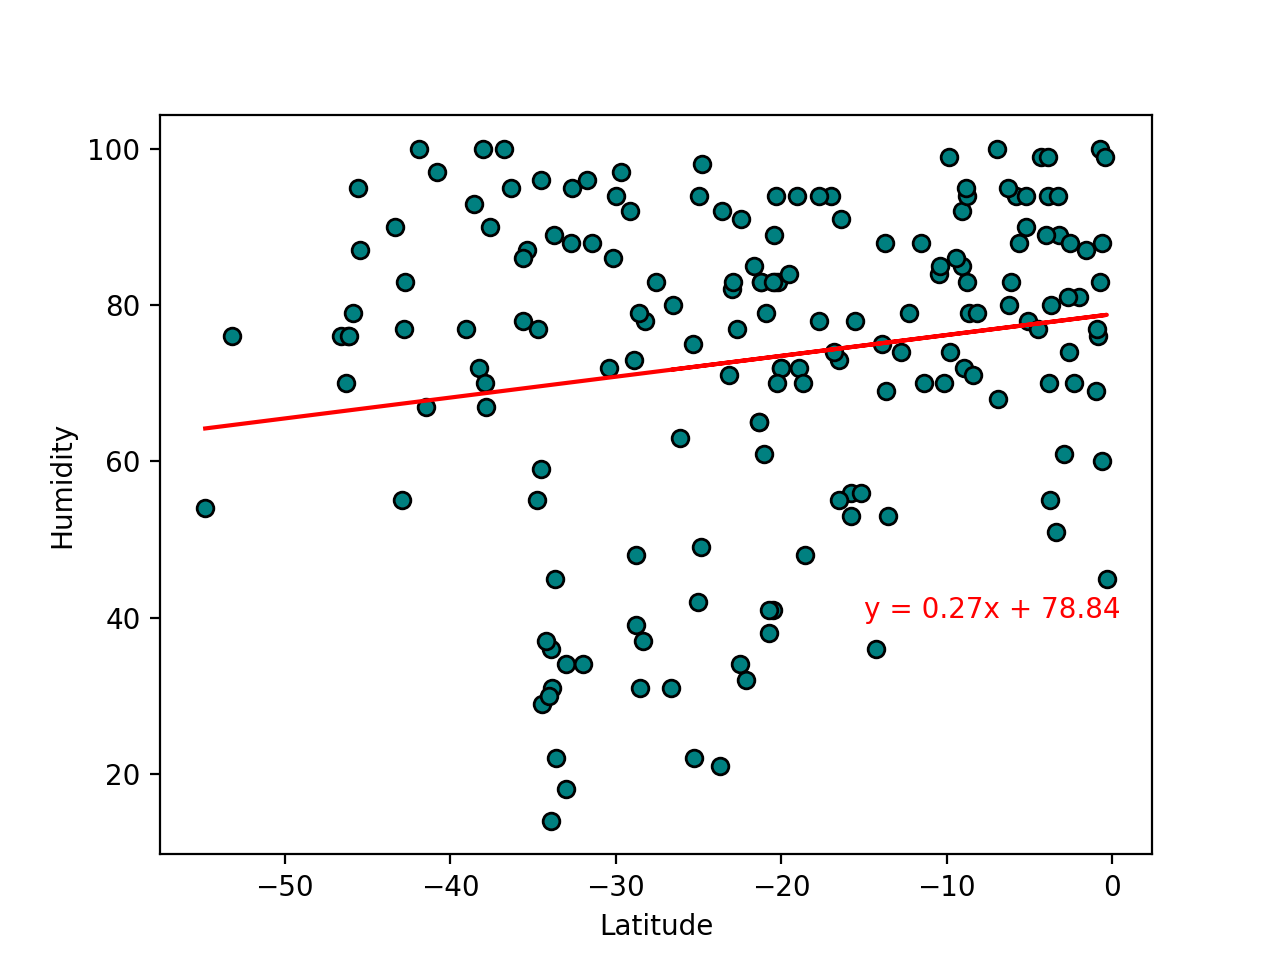

In [102]:
result4 = linregress(south['Lat'], south['Humidity'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result4.rvalue}")
reg_val4 = south['Lat'] * result4.slope + result4.intercept

slat_temp = plt.scatter(south['Lat'], south['Humidity'], edgecolor='black', c="teal")
plt.plot(south['Lat'], reg_val4, "r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq(result4.slope, result4.intercept), (-15,40), fontsize=10, color="red")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.08158101002993143


<IPython.core.display.Javascript object>


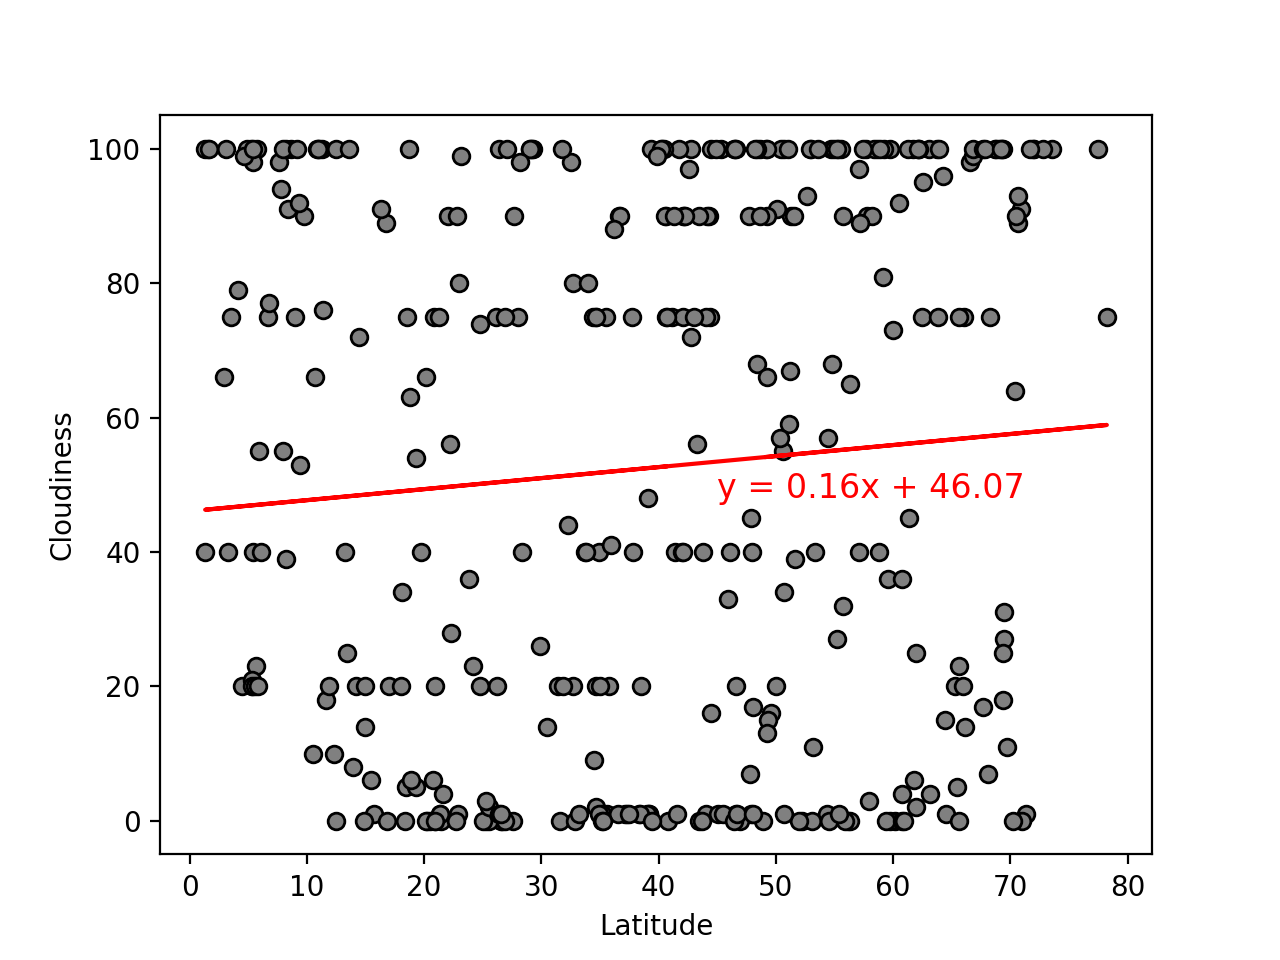

In [104]:
result5 = linregress(north['Lat'], north['Cloudiness'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result5.rvalue}")
reg_val5 = north['Lat'] * result5.slope + result5.intercept

nlat_temp = plt.scatter(north['Lat'], north['Cloudiness'], edgecolor='black', c="gray")
plt.plot(north['Lat'], reg_val5, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq(result5.slope, result5.intercept), (45,48), fontsize=12, color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.17911129037708837


<IPython.core.display.Javascript object>


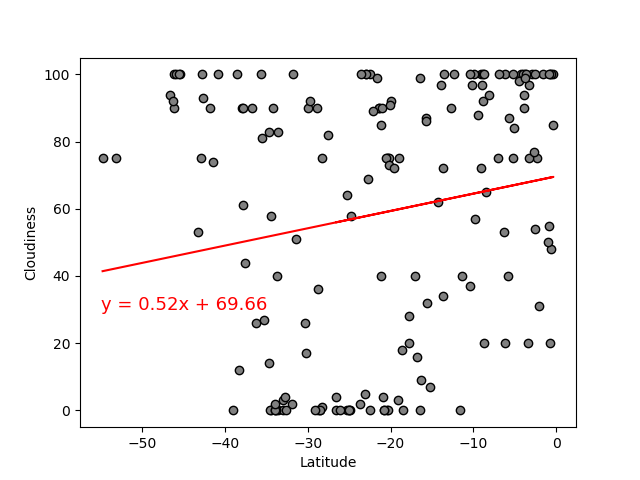

In [97]:
result6 = linregress(south['Lat'], south['Cloudiness'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result6.rvalue}")
reg_val6 = south['Lat'] * result6.slope + result6.intercept

slat_temp = plt.scatter(south['Lat'], south['Cloudiness'], edgecolor='black', c="gray")
plt.plot(south['Lat'], reg_val6, "r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq(result6.slope, result6.intercept), (-55,30), fontsize=13, color="red")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.06559287552323746


<IPython.core.display.Javascript object>


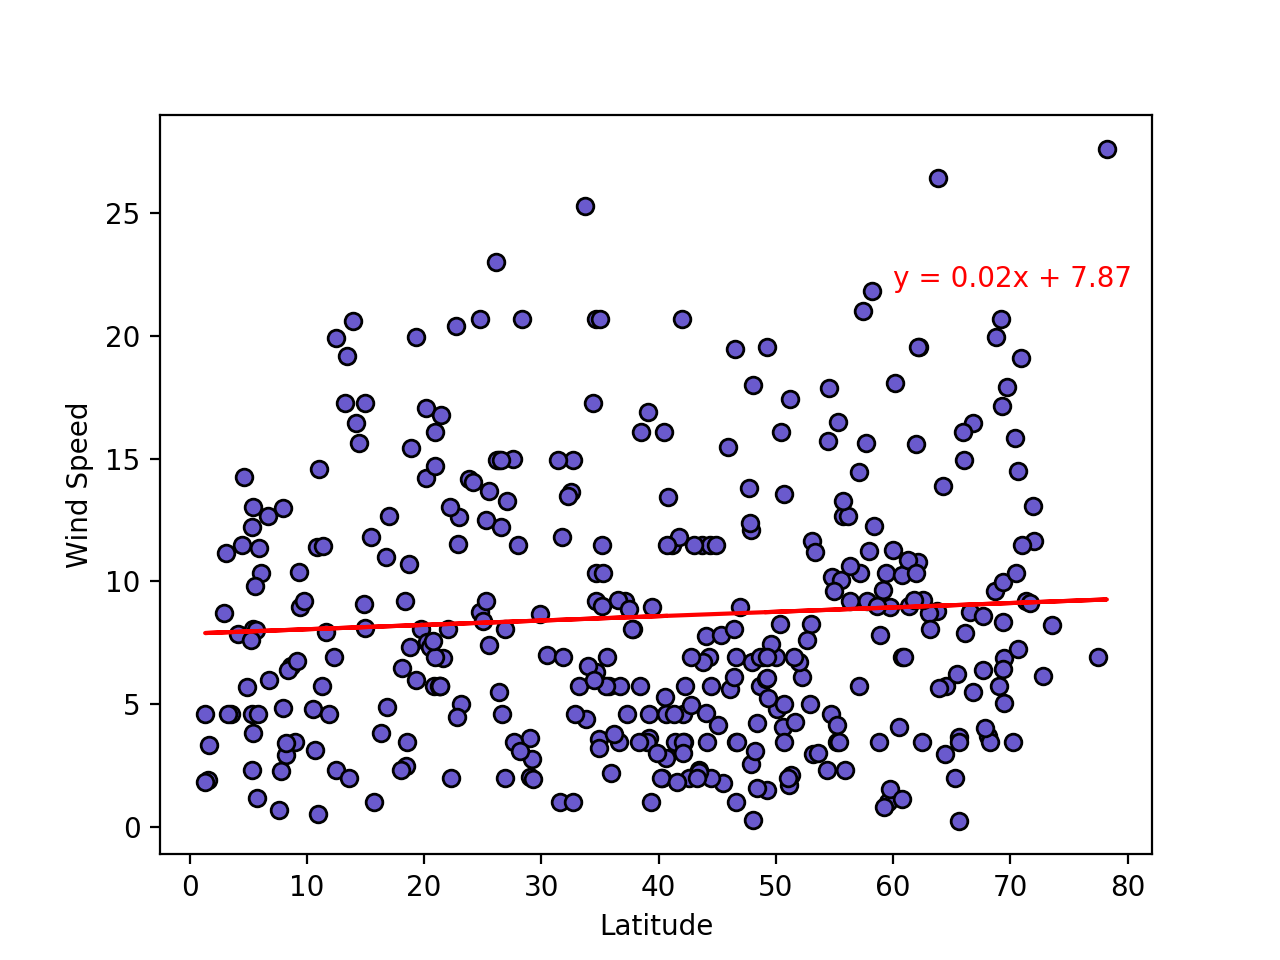

In [112]:
result7 = linregress(north['Lat'], north['Wind Speed'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result7.rvalue}")
reg_val7 = north['Lat'] * result7.slope + result7.intercept

nlat_temp = plt.scatter(north['Lat'], north['Wind Speed'], edgecolor='black', c="slateblue")
plt.plot(north['Lat'], reg_val7, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq(result7.slope, result7.intercept), (60,22), fontsize=10, color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.014768023093384664


<IPython.core.display.Javascript object>


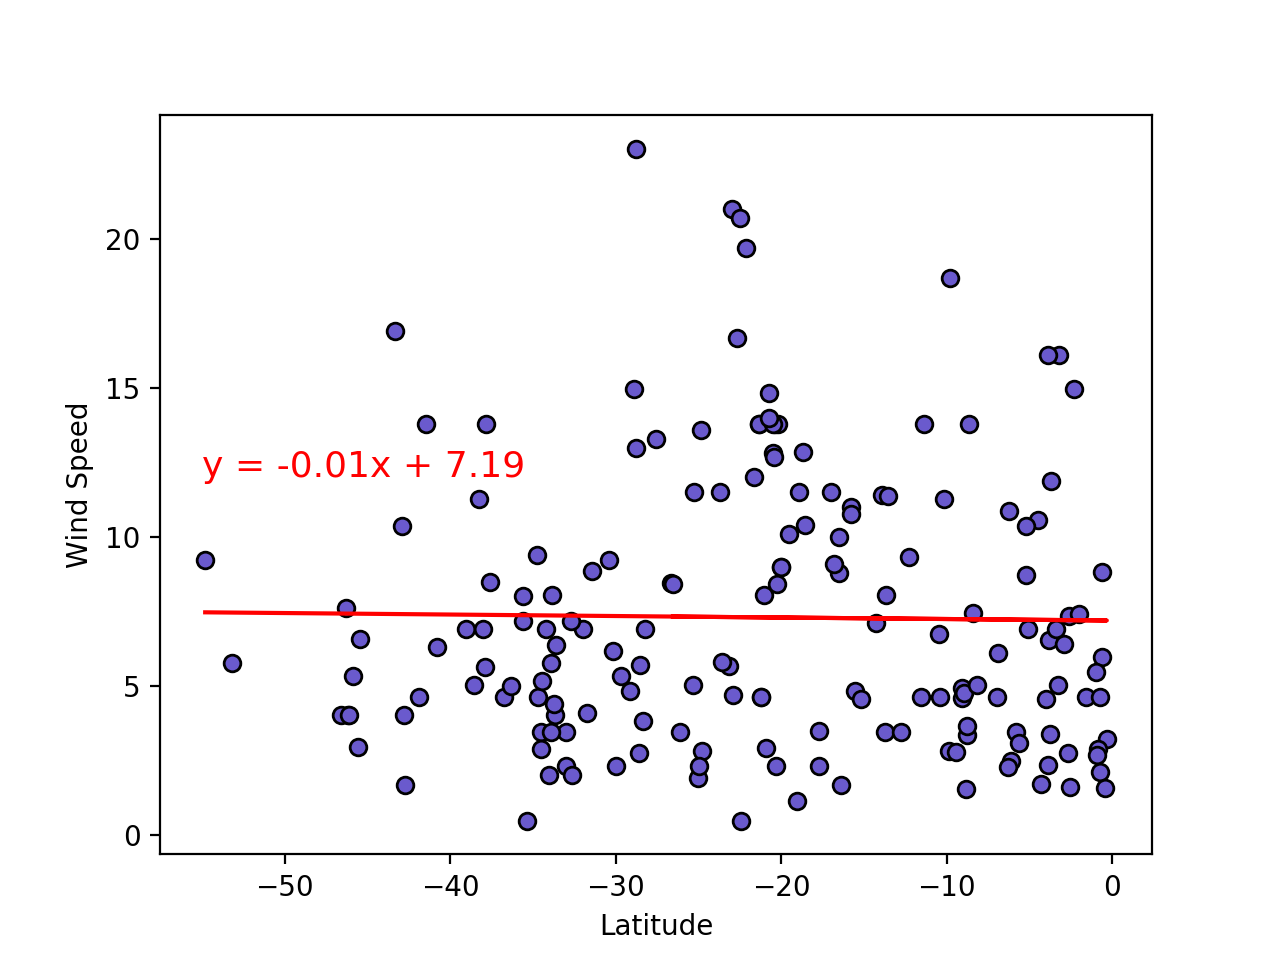

In [113]:
result8 = linregress(south['Lat'], south['Wind Speed'])
#returns slope, intercept, rvalue pvalue, stderr

print(f"The r-value is {result8.rvalue}")
reg_val8 = south['Lat'] * result8.slope + result8.intercept

slat_temp = plt.scatter(south['Lat'], south['Wind Speed'], edgecolor='black', c="slateblue")
plt.plot(south['Lat'], reg_val8, "r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq(result8.slope, result8.intercept), (-55, 12), fontsize=13, color="red")
plt.show()
